not robust to outliers
not robust to missing values
sensitive to scale of the input features 
do not assume same interval

is it better to use Robust Scaler

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data = pd.read_excel("owid-covid-data.xlsx")
italy_data = data[data['location'] == "Italy"]
italy_data.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
146398,ITA,Europe,Italy,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
146399,ITA,Europe,Italy,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
146400,ITA,Europe,Italy,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,27.8,NaN,3.18,83.51,0.892,59037472,-1904.1,-12.37,-12.37,-32.00137
146401,ITA,Europe,Italy,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
146402,ITA,Europe,Italy,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN


In [4]:
italy_data['date'] = pd.to_datetime(italy_data['date'])
italy_data.columns

/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_9541/2190825487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_data['date'] = pd.to_datetime(italy_data['date'])


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
# drop iso_code, contient, and location as the are not relevant
italy_data = italy_data.drop(['iso_code', 'continent', 'location'], axis=1)
# drop total_cases since it is new_cases accumulated
italy_data = italy_data.drop(['total_cases', 'total_cases_per_million'], axis=1)

In [6]:
#missing values
missing_values_sum = italy_data.isna().sum()
print(missing_values_sum)

date                                          0
new_cases                                     6
new_cases_smoothed                           11
total_deaths                                 51
new_deaths                                    6
                                           ... 
population                                    0
excess_mortality_cumulative_absolute       1175
excess_mortality_cumulative                1175
excess_mortality                           1175
excess_mortality_cumulative_per_million    1175
Length: 62, dtype: int64


In [7]:
# since we are focusing on country level, remove features with more than 30% missingness
missing_percentage = italy_data.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > 30].index
italy_data.drop(columns=columns_to_drop, inplace=True)
# remove quasi-constant features with more than 98% same values
#Removing quasi-constant features
from sklearn.feature_selection import VarianceThreshold
italy_data_temp = italy_data.select_dtypes(include=[np.number])
sel = VarianceThreshold(threshold=0.02)  
sel.fit(italy_data_temp)  # fit finds the features with low variance
sel_idx = italy_data_temp.columns[sel.get_support()]
print(
    len([
        x for x in italy_data_temp.columns
        if x not in italy_data_temp.columns[sel.get_support()]
    ]))
[x for x in italy_data_temp.columns if x not in italy_data_temp.columns[sel.get_support()]]
italy_data_temp = sel.transform(italy_data_temp)
italy_data_temp = pd.DataFrame(italy_data_temp, columns=sel_idx)
italy_data_temp['date'] = italy_data['date']
italy_data_temp.shape

14


(1357, 32)

In [8]:
italy_data = italy_data_temp
italy_data.columns

Index(['new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'icu_patients', 'icu_patients_per_million',
       'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'date'],
      dtype='object')

In [10]:
# now we want to impute missing values using forward fill
nan_start_columns = [col for col in italy_data.columns if italy_data[col].isnull().values[0]]
print(nan_start_columns)
for col in nan_start_columns:
    italy_data.loc[italy_data.index[0], col] = 0
italy_data = italy_data.fillna(method='ffill')

[]


/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_9541/1640829968.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  italy_data = italy_data.fillna(method='ffill')


In [11]:
italy_data['reproduction_rate'].describe()

count    1357.000000
mean        1.073839
std         0.392301
min         0.000000
25%         0.860000
50%         1.070000
75%         1.310000
max         3.540000
Name: reproduction_rate, dtype: float64

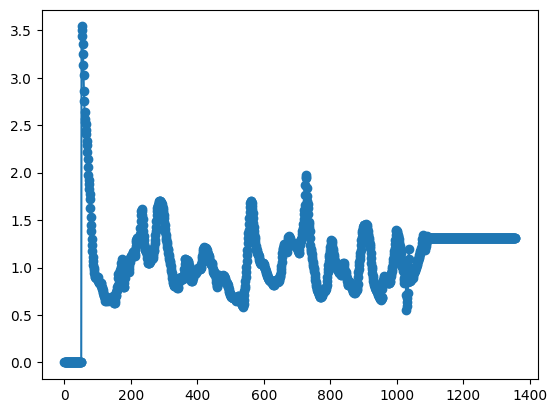

In [12]:
plt.plot(italy_data.index, italy_data['reproduction_rate'], marker='o')

In [13]:
italy_data['icu_patients'].describe()

count    1357.000000
mean      813.056006
std      1057.194699
min         0.000000
25%       132.000000
50%       327.000000
75%      1012.000000
max      4068.000000
Name: icu_patients, dtype: float64

In [14]:
missing_values_sum = italy_data.isna().sum()
print(missing_values_sum)

new_cases                                     0
new_cases_smoothed                            0
total_deaths                                  0
new_deaths                                    0
new_deaths_smoothed                           0
new_cases_per_million                         0
new_cases_smoothed_per_million                0
total_deaths_per_million                      0
new_deaths_per_million                        0
new_deaths_smoothed_per_million               0
reproduction_rate                             0
icu_patients                                  0
icu_patients_per_million                      0
hosp_patients                                 0
hosp_patients_per_million                     0
weekly_icu_admissions                         0
weekly_icu_admissions_per_million             0
weekly_hosp_admissions                        0
weekly_hosp_admissions_per_million            0
total_vaccinations                            0
people_vaccinated                       

In [ ]:
#test train split 
train=italy_data.iloc[:-14 ]
test=italy_data.iloc[-14: ]
print(train.shape, test.shape)

(1157, 32) (200, 32)
